# Introduction: what is image processing?
(teaching: 15 minutes, exercises: 5 minutes)

### Questions:

- What is image processing and how is it useful in neuroimaging?
- How are images represented in scientific computing?

### Objectives:
- Explain the role of image processing in neuroimaging
- Identify image data, and distinguish it from other data (e.g., tabular, time-series, etc.)
- Extract image data from neuroimaging file formats with nibabel
- Slice and stride through data arrays with numpy indexing operations
- Visualize image data with Matplotlib

### Key points:

- Image processing operations are a central part of neuroimaging.
- Images are homogenous arrays, where spatial relationships are important
- Many different operations can be performed on images, and processing pipelines can be build combining them
- Images can be efficiently and usefully represented as arrays
- Arrays can be manipulated with numpy operations, and visualized using Matplotlib

### Image processing is central to neuroimaging

Image processing is a large and very general set of tools that are used across a
variety of research disciplines to analyze image data. Naturally, image
processing algorithms are fundamental to neuroimaging, because a lot (if not
all) the data that we analyze in neuroimaging is image data.

What is image data? How is it different from other data, such as time-series,
or tabular data?

For our purposes: image data is defined as multi-dimensional homogenous data in
which *spatial relationships matter*. That is, neighboring pixels are treated
differently than pixels from disparate parts of the array. Spatial contiguity is
meaningful. Usually, image data will have 2 or 3 dimensions, corresponding to
the 3 spatial dimensions or 2D projection: either from a specific view-point
(think photographs) or through a 3D object (think slice). But it is possible to
use image processing algorithms in cases in which there are more dimensions, and
where the dimensions do not correspond to the spatial dimensions (does anyone
know a good example of this?).

> ## What is a good example of pseudo-image data?
>
> - In radio-astronomy, Fourier spectra are analyzed using image-processing
>   methods
> - In a project recently undertaken in the 
> [University of Washington eScience Institute Data Science Incubator Program](http://escience.washington.edu/get-involved/incubator-programs/winter-2016/),
> Siva Kasinathan used image-processing algorithms to characterize and reassemble sequences from human chromosome centromeres.
>

> Note that these categories are also not mutually exclusive. For example,
> functional MRI data is image data, but is also time-series data at the same
> time.


### Some common image processing operations

There are many different kinds of image processing operations. Here are a few common operations:

- Filtering
  - Detrending
  - Denoising
  - Smoothing
- Segmentation
- Feature detection
- Texture analysis
- Statistical characterization
- Classification
- Registration
- Combination (e.g. 'stitching')


### Images can be represented in arrays

Because of their nature (homogenous/spatial dimensions matter) data lend
themselves easily to a representation as arrays. Let's demonstrate this with
some human neuroimaging data.

## Nibabel: accessing a cacophony of neuroimaging file formats

One of the challenges of data science in neuroimaging (and in other
scientific fields) is the range of different file formats that are used to
store data. Often these files will be opaque to a naive user, because the data
is stored in a binary format, that cannot be read without knowledge of the
organization of the data on disks.

The `nibabel` library alleviates these difficulty through a careful
implemntation of a wider range of different neuroimaging file-formats.
Wherever possible, the library presents a common interface to these different
file formats, making it particularly easy to write code that will work on
data stored in these different formats.

To install it, you can use the following command-line call:

     pip install nibabel
     
## Dipy: diffusion MRI and computational neuroimaging

[`Dipy`](http://dipy.org) stands for "diffusion MRI in Python", but 
it is a library devoted to diffusion MRI, as well as other applications
in computational neuroimaging. Later in this lesson, we will use Dipy 
for its capabilities in image registration. For now, we will use the 
library to access openly available human neuroimaging data

In [1]:
import dipy.data as dpd

In [2]:
remote, local = dpd.fetch_stanford_t1()

Dataset is already in place. If you want to fetch it again please first remove the folder /home/jovyan/.dipy/stanford_hardi 


In [3]:
print(remote)
print(local)

{'t1.nii.gz': ('https://stacks.stanford.edu/file/druid:yx282xq2090/t1.nii.gz', 'a6a140da6a947d4131b2368752951b0a')}
/home/jovyan/.dipy/stanford_hardi


`remote` is the URL from which the data was read (and a cryptographic hash used to validate the data)

`local` is where the data is stored on your machine

IPython knows how to make sense of that:

In [4]:
!ls $local

HARDI150.bval  HARDI150.bvec  HARDI150.nii.gz  t1.nii.gz


The data is stored in a compressed NIfTI file (`nii.gz` extension)

The path to the file we want is:

In [5]:
import os.path as op
t1_file = op.join(local, 't1.nii.gz')

The `nibabel` API for reading data from file has two steps:

In [6]:
import nibabel as nib
T1w_img = nib.load(t1_file)

Because `nibabel` loads the data "lazily", the data hasn't been read into memory
yet, only some basic metadata stored in the file header. To access the data, we
need to explicitly call the `get_data` method of the image object that we
currently have in memory:

In [7]:
T1w_data = T1w_img.get_data()

The data is stored in a `numpy` array. We can verify that by running:

In [8]:
type(T1w_data)

numpy.ndarray

We can check some basic properties of this array by running:

In [9]:
print(T1w_data.shape)
print(T1w_data.dtype)

(81, 106, 76)
int16


We can also visualize the data that was stored in the file using `Matplotlib`

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


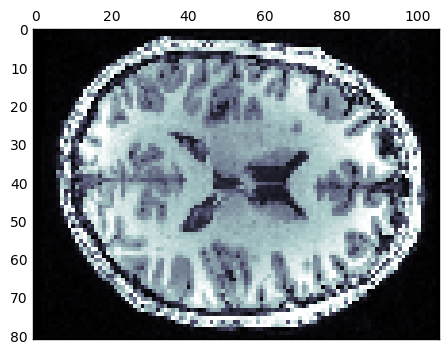

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1)
ax.matshow(T1w_data[:, :, T1w_data.shape[-1]//2], cmap='bone')

> ## Exercise: The nibabel header
>
> Explore the 'T1w_img' object. How would you extract information about the
> parameters used to collect data? What information is missing?
>

> ## Solution: The nibabel header
>  
> Information about the acquisition can be accessed using the image header:
>
>     hdr = T1w_img.get_header()
>
> For example:
>
>     affine = hdr.get_zooms()
>
> will usually provide the dimensions of the voxel (how do we know the units?)
>
> Some information might be missing from the file header (or not make sense).
> For example, try running:
>
>     hdr.get_n_slices()
>


> ## Affine transforms
>
> The nibabel image header also contains the affine transformation between the
> image and a standard space (usually the scanner iso-center in mm). For more
> information on how and why this information is used, you might want to refer
> to [this excellent tutorial in the nibabel documentation](http://nipy.org/nibabel/coordinate_systems.html).
>
>